In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import time
import geopandas as gpd
from shapely import wkt
import os

In [6]:
dataset_path = "datasets/"
test_image_output_path = "test_image_outputs/"
master_datasets_path = "master_datasets/"
old_code_path = "old_code/"
code_path = "code/"

In [23]:
# temp_df = pd.read_csv(dataset_path + "NOW_LAST_FINAL_TEMPERATURE.csv")
co2_df = pd.read_csv(dataset_path + "FINAL_CO2.csv")
ice_df = pd.read_csv(dataset_path + "FINAL_ICE.csv")
sea_df = pd.read_csv(dataset_path + "FINAL_SEA.csv")

In [107]:
sea_df = pd.read_csv(dataset_path + "FINAL_SEA.csv")

In [58]:
temp_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 515052 entries, 0 to 515051
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Country                 515052 non-null  object        
 1   Date                    515052 non-null  datetime64[ns]
 2   Temperature             515052 non-null  float64       
 3   geometry                515052 non-null  geometry      
 4   Temperature_normalised  515052 non-null  float64       
dtypes: datetime64[ns](1), float64(2), geometry(1), object(1)
memory usage: 19.6+ MB


In [59]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      2052 non-null   datetime64[ns]
 1   Global_CO2_Emissions_ppm  2052 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 32.2 KB


In [60]:
ice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   2052 non-null   datetime64[ns]
 1   Arctic_sea_ice_extent  2052 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 32.2 KB


In [108]:
sea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2052 non-null   object 
 1   Global_mean_sea_levels  2052 non-null   float64
dtypes: float64(1), object(1)
memory usage: 32.2+ KB


In [28]:
# do not run more than once

# temp_df.geometry = temp_df.geometry.apply(wkt.loads)
# geometry = temp_df.geometry
# crs = {'init': 'epsg:4326'}
# temp_df = gpd.GeoDataFrame(temp_df, crs=crs, geometry=geometry)
# temp_df.info()

/Users/aman/.pyenv/versions/3.8.6/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 515052 entries, 0 to 515051
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Country                 515052 non-null  object  
 1   Date                    515052 non-null  object  
 2   Temperature             515052 non-null  float64 
 3   geometry                515052 non-null  geometry
 4   Temperature_normalised  515052 non-null  float64 
dtypes: float64(2), geometry(1), object(2)
memory usage: 19.6+ MB


In [109]:
temp_df.Date = pd.to_datetime(temp_df.Date)
ice_df.Date = pd.to_datetime(ice_df.Date)
co2_df.Date = pd.to_datetime(co2_df.Date)
sea_df.Date = pd.to_datetime(sea_df.Date)

In [63]:
temp_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 515052 entries, 0 to 515051
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Country                 515052 non-null  object        
 1   Date                    515052 non-null  datetime64[ns]
 2   Temperature             515052 non-null  float64       
 3   geometry                515052 non-null  geometry      
 4   Temperature_normalised  515052 non-null  float64       
dtypes: datetime64[ns](1), float64(2), geometry(1), object(1)
memory usage: 19.6+ MB


In [64]:
ice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   2052 non-null   datetime64[ns]
 1   Arctic_sea_ice_extent  2052 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 32.2 KB


In [65]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      2052 non-null   datetime64[ns]
 1   Global_CO2_Emissions_ppm  2052 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 32.2 KB


In [110]:
sea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2052 non-null   datetime64[ns]
 1   Global_mean_sea_levels  2052 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 32.2 KB


In [67]:
merge1 = pd.merge(temp_df, ice_df, how='left', left_on=['Date'], right_on=['Date'])
merge1.head(14)

,Country,Date,Temperature,geometry,Temperature_normalised,Arctic_sea_ice_extent
0,Afghanistan,1850-01-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05
1,Afghanistan,1850-02-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05
2,Afghanistan,1850-03-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05
3,Afghanistan,1850-04-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05
4,Afghanistan,1850-05-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05
5,Afghanistan,1850-06-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05
6,Afghanistan,1850-07-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05
7,Afghanistan,1850-08-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05
8,Afghanistan,1850-09-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05
9,Afghanistan,1850-10-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05


In [68]:
merge1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 515052 entries, 0 to 515051
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Country                 515052 non-null  object        
 1   Date                    515052 non-null  datetime64[ns]
 2   Temperature             515052 non-null  float64       
 3   geometry                515052 non-null  geometry      
 4   Temperature_normalised  515052 non-null  float64       
 5   Arctic_sea_ice_extent   515052 non-null  float64       
dtypes: datetime64[ns](1), float64(3), geometry(1), object(1)
memory usage: 27.5+ MB


In [69]:
merge1.Arctic_sea_ice_extent.unique()

array([7.05, 7.67, 7.14, 7.3 , 7.39, 6.81, 6.7 , 7.41, 7.28, 7.37, 7.01,
       6.14, 6.47, 7.47, 6.4 , 6.08, 7.58, 6.69, 6.54, 6.12, 6.25, 6.73,
       5.83, 5.98, 5.5 , 5.86, 4.27, 4.69, 5.26, 4.87, 4.56, 3.57, 5.21,
       5.22, 4.62, 4.53, 4.82, 4.79, 4.36, 3.92])

In [70]:
ice_df.Arctic_sea_ice_extent.unique()

array([7.05, 7.67, 7.14, 7.3 , 7.39, 6.81, 6.7 , 7.41, 7.28, 7.37, 7.01,
       6.14, 6.47, 7.47, 6.4 , 6.08, 7.58, 6.69, 6.54, 6.12, 6.25, 6.73,
       5.83, 5.98, 5.5 , 5.86, 4.27, 4.69, 5.26, 4.87, 4.56, 3.57, 5.21,
       5.22, 4.62, 4.53, 4.82, 4.79, 4.36, 3.92])

In [71]:
merge2 = pd.merge(merge1, co2_df, how='left', left_on=['Date'], right_on=['Date'])
merge2.head(14)

,Country,Date,Temperature,geometry,Temperature_normalised,Arctic_sea_ice_extent,Global_CO2_Emissions_ppm
0,Afghanistan,1850-01-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,284.944656
1,Afghanistan,1850-02-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,285.333792
2,Afghanistan,1850-03-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,285.682825
3,Afghanistan,1850-04-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,285.931179
4,Afghanistan,1850-05-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,285.885928
5,Afghanistan,1850-06-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,285.166410
6,Afghanistan,1850-07-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,283.535435
7,Afghanistan,1850-08-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,281.936465
8,Afghanistan,1850-09-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,281.901051
9,Afghanistan,1850-10-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,282.941449


In [72]:
merge2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 515052 entries, 0 to 515051
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Country                   515052 non-null  object        
 1   Date                      515052 non-null  datetime64[ns]
 2   Temperature               515052 non-null  float64       
 3   geometry                  515052 non-null  geometry      
 4   Temperature_normalised    515052 non-null  float64       
 5   Arctic_sea_ice_extent     515052 non-null  float64       
 6   Global_CO2_Emissions_ppm  515052 non-null  float64       
dtypes: datetime64[ns](1), float64(4), geometry(1), object(1)
memory usage: 31.4+ MB


In [73]:
merge2.Global_CO2_Emissions_ppm.min()

281.901050552666

In [74]:
merge2.Global_CO2_Emissions_ppm.max()

399.179692

In [75]:
co2_df.Global_CO2_Emissions_ppm.min()

281.901050552666

In [76]:
co2_df.Global_CO2_Emissions_ppm.max()

399.179692

In [111]:
merge3 = pd.merge(merge2, sea_df, how='left', left_on=['Date'], right_on=['Date'])
merge3.head(14)

,Country,Date,Temperature,geometry,Temperature_normalised,Arctic_sea_ice_extent,Global_CO2_Emissions_ppm,Global_mean_sea_levels
0,Afghanistan,1850-01-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,284.944656,-183.0
1,Afghanistan,1850-02-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,285.333792,-183.0
2,Afghanistan,1850-03-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,285.682825,-183.0
3,Afghanistan,1850-04-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,285.931179,-183.0
4,Afghanistan,1850-05-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,285.885928,-183.0
5,Afghanistan,1850-06-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,285.166410,-183.0
6,Afghanistan,1850-07-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,283.535435,-183.0
7,Afghanistan,1850-08-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,281.936465,-183.0
8,Afghanistan,1850-09-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,281.901051,-183.0
9,Afghanistan,1850-10-15,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124,7.05,282.941449,-183.0


In [112]:
merge3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 515052 entries, 0 to 515051
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Country                   515052 non-null  object        
 1   Date                      515052 non-null  datetime64[ns]
 2   Temperature               515052 non-null  float64       
 3   geometry                  515052 non-null  geometry      
 4   Temperature_normalised    515052 non-null  float64       
 5   Arctic_sea_ice_extent     515052 non-null  float64       
 6   Global_CO2_Emissions_ppm  515052 non-null  float64       
 7   Global_mean_sea_levels    515052 non-null  float64       
dtypes: datetime64[ns](1), float64(5), geometry(1), object(1)
memory usage: 35.4+ MB


In [113]:
merge3.Global_mean_sea_levels.min()

-184.5

In [114]:
merge3.Global_mean_sea_levels.max()

82.4

In [115]:
sea_df.Global_mean_sea_levels.min()

-184.5

In [116]:
sea_df.Global_mean_sea_levels.max()

82.4

In [117]:
temp_df.Date.min()

Timestamp('1850-01-15 00:00:00')

In [118]:
co2_df.Date.min()

Timestamp('1850-01-15 00:00:00')

In [119]:
ice_df.Date.min()

Timestamp('1850-01-15 00:00:00')

In [120]:
sea_df.Date.min()

Timestamp('1850-01-15 00:00:00')

In [121]:
final_master = merge3

In [122]:
final_master = final_master.astype(object)

In [123]:
final_master.to_csv(dataset_path + 'FINAL_MASTER.csv', encoding='utf-8', index=False)

In [124]:
print("FINALLY Merging done!!!!!!!")

FINALLY Merging done!!!!!!!


___

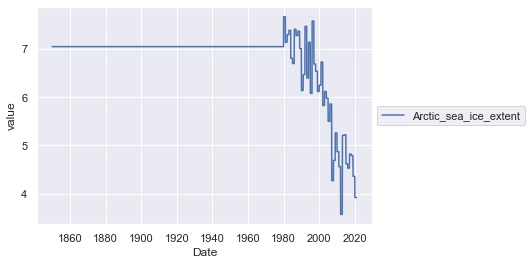

In [125]:
sns.lineplot(x='Date', y='value', hue='variable',
             data=pd.melt(ice_df, ['Date']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

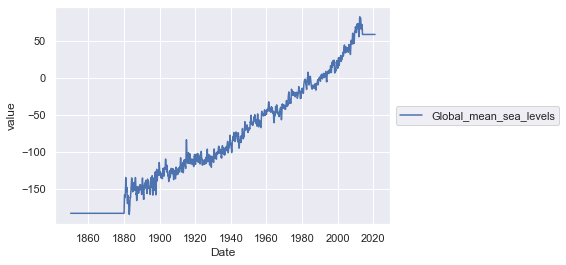

In [126]:
sns.lineplot(x='Date', y='value', hue='variable',
             data=pd.melt(sea_df, ['Date']))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [168]:
my_dates = pd.DataFrame(['1850-01-15', '1950-01-15', '1990-01-15', '2000-01-15', '2019-01-15'])
my_dates.rename(columns = {0:'Date'}, 
               inplace = True)
my_dates.Date = pd.to_datetime(my_dates.Date)
my_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 168.0 bytes


In [169]:
my_dates.head()

,Date
0,1850-01-15
1,1950-01-15
2,1990-01-15
3,2000-01-15
4,2019-01-15


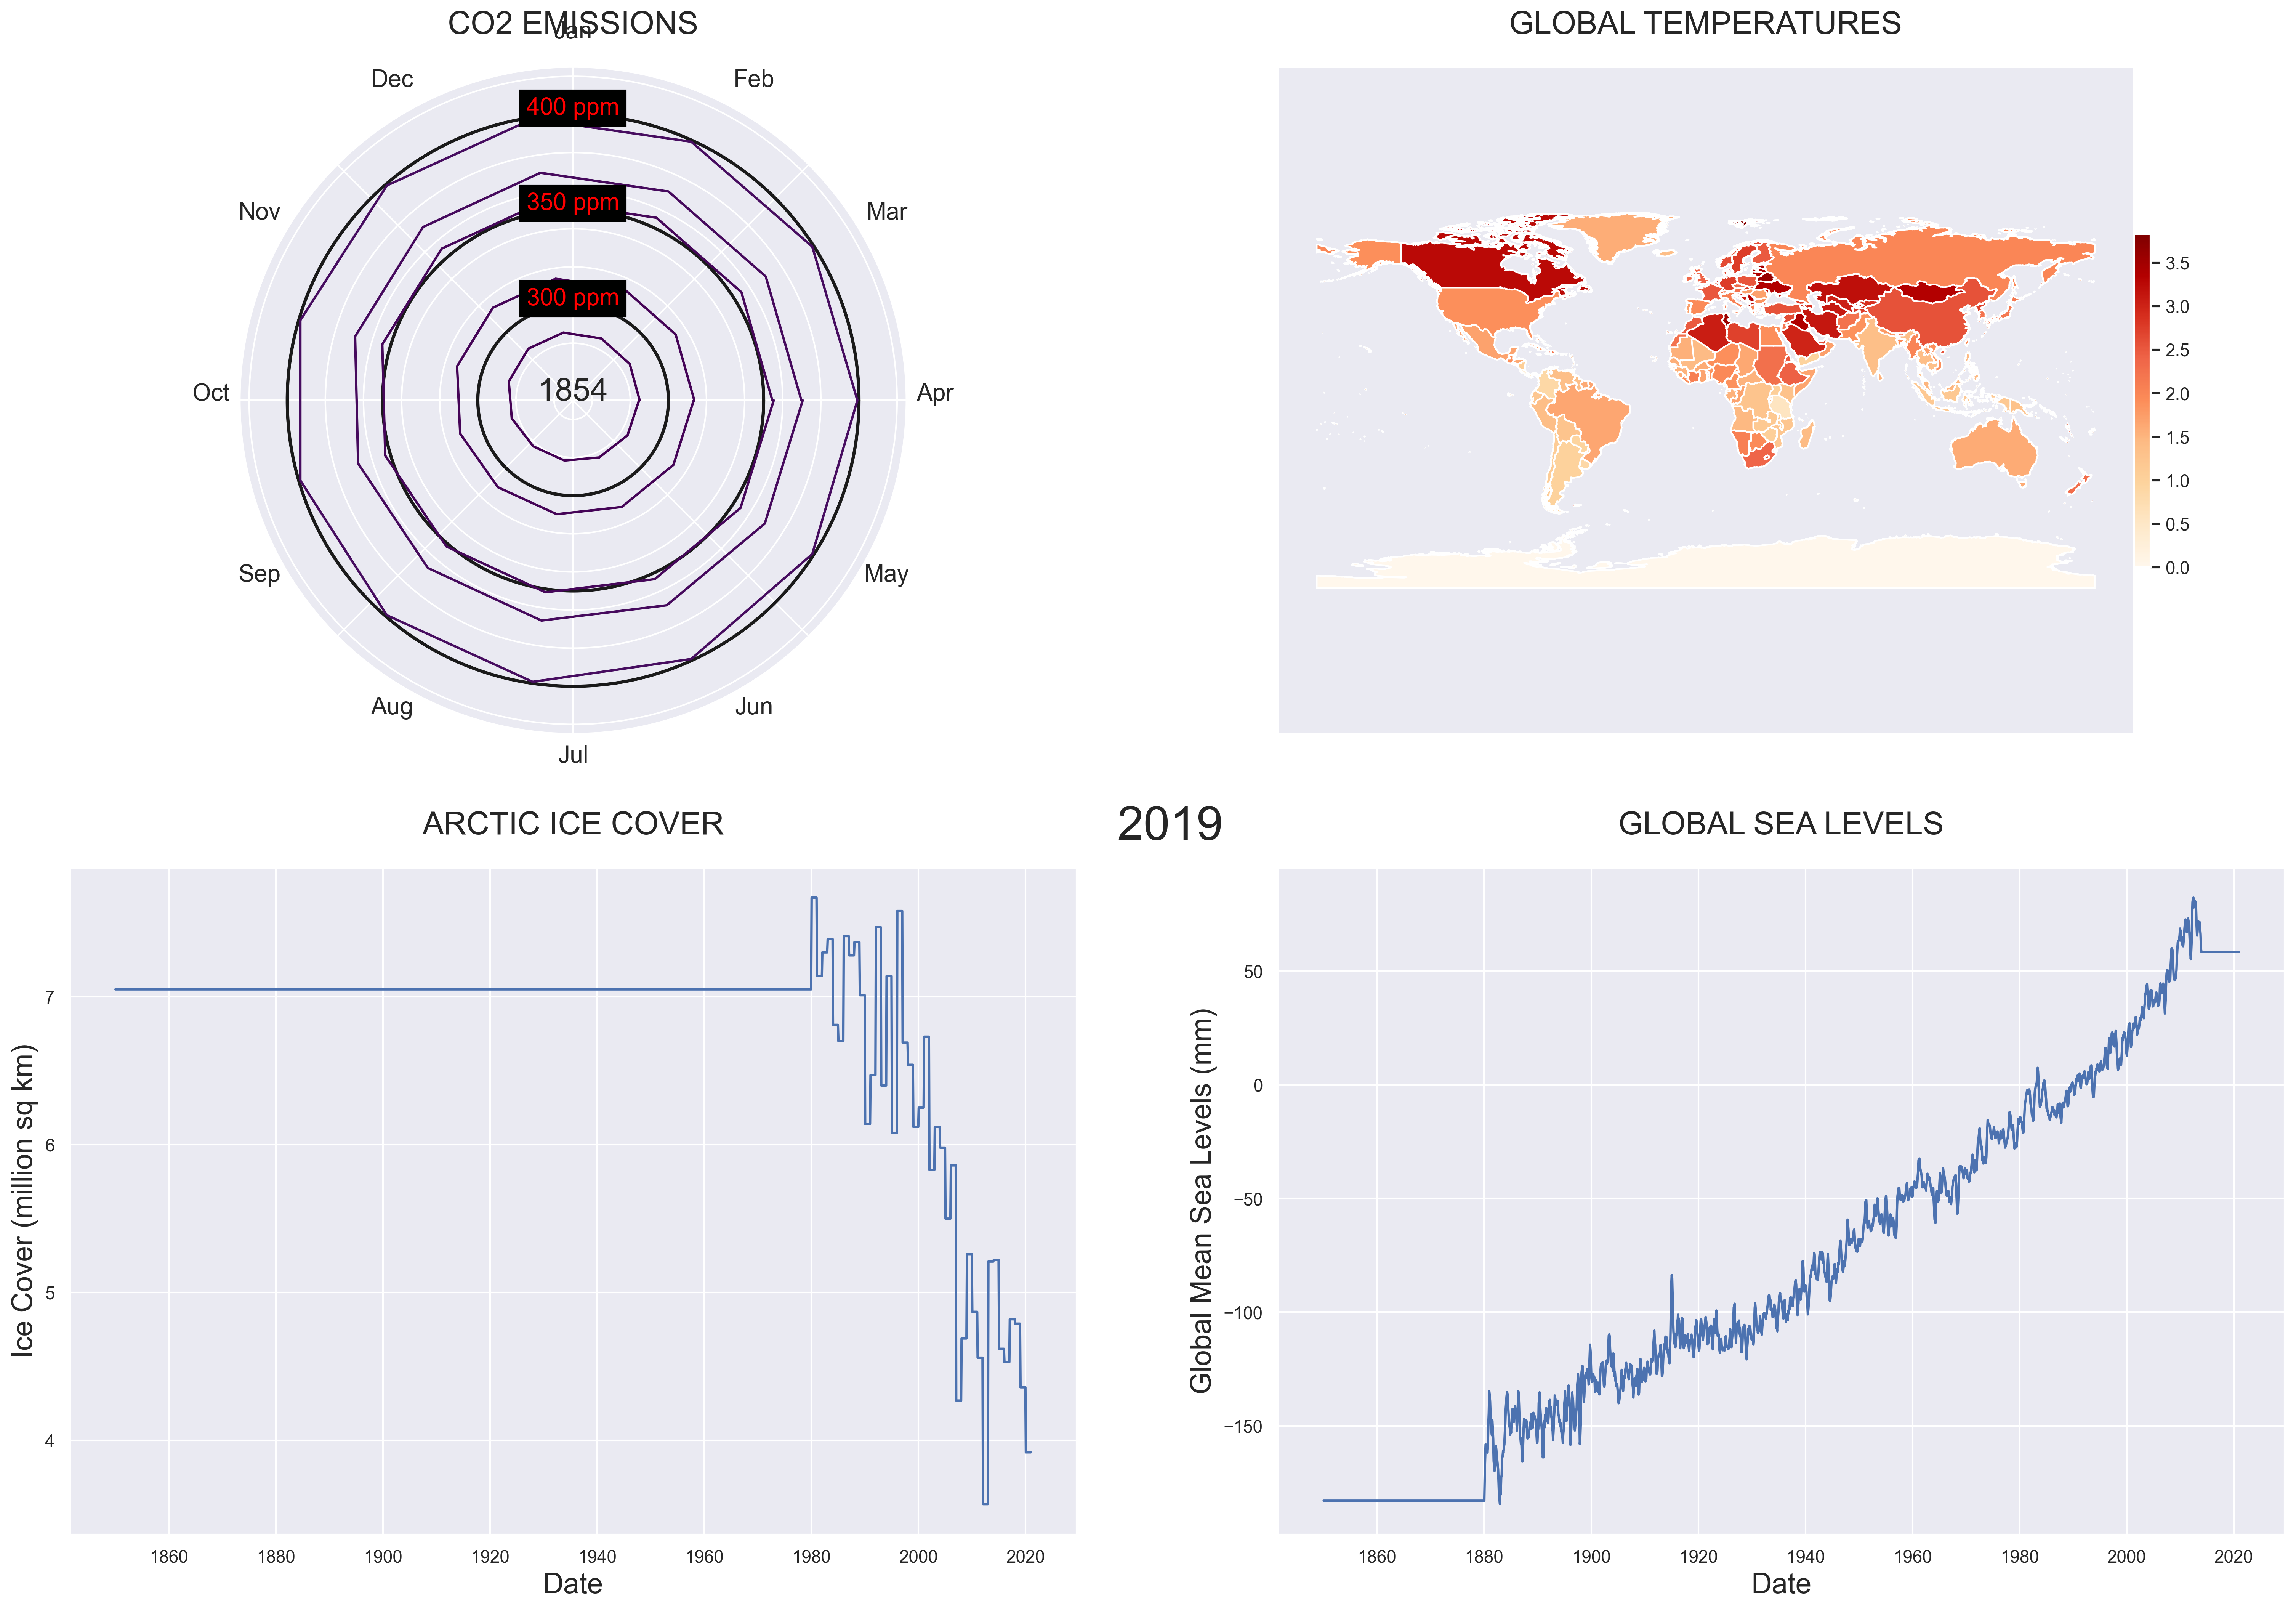

In [170]:
path = 'images/'

variable = 'Temperature_normalised'

months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
years = merge3.Date.dt.year.unique()

image_no = 0
ctr = 0

fig = plt.figure(figsize=(25, 17), dpi=300)
ax1 = plt.subplot(221, projection='polar')
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

theta = np.linspace(0, 2*np.pi, 12)
ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])
months_angles = np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13)
for i, month in enumerate(months):
    ax1.text(months_angles[i], 440, month, fontsize=15, ha="center")
    
full_circle_thetas = np.linspace(0, 2*np.pi, 1000)

blue_one_radii=[300]*1000
red_one_radii=[350]*1000
red_two_radii=[400]*1000

ax1.plot(full_circle_thetas, blue_one_radii, c='k', lw=2)
ax1.plot(full_circle_thetas, red_one_radii, c='k', lw=2)
ax1.plot(full_circle_thetas, red_two_radii, c='k', lw=2)

ax1.text(np.pi/2, 300, "300 ppm", color="red", ha='center', 
         fontsize= 15, bbox=dict(facecolor='#000100', edgecolor='#000100'))
ax1.text(np.pi/2, 350, "350 ppm", color="red", ha='center', 
         fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))
ax1.text(np.pi/2, 400, "400 ppm", color="red", ha='center', 
         fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))



ax1.set_title("CO2 EMISSIONS\n", fontdict = {'fontsize': 20, 'fontweight' : 4}, pad=0.02)
ax2.set_title("GLOBAL TEMPERATURES\n", fontdict = {'fontsize': 20, 'fontweight' : 4}, pad=0.02)
ax3.set_title("\nARCTIC ICE COVER\n", fontdict = {'fontsize': 20, 'fontweight' : 4}, pad=0.02)
ax4.set_title("\nGLOBAL SEA LEVELS\n", fontdict = {'fontsize': 20, 'fontweight' : 4}, pad=0.02)


ax1.set_ylim(250, 425)


vmin, vmax = merge3.Temperature_normalised.min(), merge3.Temperature_normalised.max()

sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, pad = 0.0001, shrink=0.5, ax=ax2)


sns.lineplot(x='Date', y='value', hue='variable',
             data=pd.melt(ice_df, ['Date']), ax=ax3)
ax3.get_legend().remove()

sns.lineplot(x='Date', y='value', hue='variable',
             data=pd.melt(sea_df, ['Date']), ax=ax4)
ax4.get_legend().remove()


for i in range(0, len(my_dates)):   
    date_for_mask = my_dates.Date.values[i]
    
    mask_co2 = (merge3['Date'] == date_for_mask)
    mask_ice = (merge3['Date'] == date_for_mask)
    mask_sea = (merge3['Date'] == date_for_mask)
    mask_map = (temp_df['Date'] == date_for_mask)
    
    my_co2 = merge3.Global_CO2_Emissions_ppm.loc[mask_co2]
    my_ice = merge3.Arctic_sea_ice_extent.loc[mask_ice]
    my_sea = merge3.Global_mean_sea_levels.loc[mask_sea]
    my_map = merge3.loc[mask_map]
    
    for txt in ax1.texts:
        if(txt.get_position()==(250,250)):
            txt.set_visible(False)
            
    year = years[ctr]
    r = co2_df[co2_df.Date.dt.year == my_dates.Date.dt.year.values[i]]['Global_CO2_Emissions_ppm']
    ax1.text(250, 250, str(year), size=20, ha='center')
    ax1.plot(theta, r, c=plt.cm.viridis(i*2))
    
    fig.suptitle(str(my_dates.Date.dt.year.values[i]), fontsize= 30, fontweight= 10, x=0.51, y=0.5)
    my_map.plot(column=variable, cmap='OrRd', ax=ax2, figsize=(30,20))    
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax2.axis('equal')
    
    ax3_vline = ax3.axvline(date_for_mask, c='k', lw=2.0)
    ax3.set_ylabel('Ice Cover (million sq km)', fontdict = {'fontsize': 18, 'fontweight' : 3})
    ax3.set_xlabel('Date', fontdict = {'fontsize': 18, 'fontweight' : 3})
    
    ax4_vline = ax4.axvline(date_for_mask, c='k', lw=2.0)
    ax4.set_ylabel('Global Mean Sea Levels (mm)', fontdict = {'fontsize': 18, 'fontweight' : 3})
    ax4.set_xlabel('Date', fontdict = {'fontsize': 18, 'fontweight' : 3})
    
#     plt.tight_layout()
    fig.savefig(os.path.join(path, 'image_{image_no:04d}.png'.format(image_no=image_no)), 
                dpi=300, bbox_inches='tight')
    ax3_vline.remove()
    ax4_vline.remove()
    image_no +=1
    ctr +=1

In [ ]:
from matplotlib.animation import FuncAnimation
import sys 

years = co2_df.Date.dt.year.unique()

# Create the base plot
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')
ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])

ax1.set_ylim(250, 425)
plt.suptitle("Global_CO2_Emissions_ppm (1850-2014)")

#add months ring
months_angles = np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13)
for i, month in enumerate(months):
    ax1.text(months_angles[i], 440, month, fontsize=15, ha="center")
    
full_circle_thetas = np.linspace(0, 2*np.pi, 1000)

blue_one_radii=[300]*1000
red_one_radii=[350]*1000
red_two_radii=[400]*1000

ax1.plot(full_circle_thetas, blue_one_radii, c='k', lw=2)
ax1.plot(full_circle_thetas, red_one_radii, c='k', lw=2)
ax1.plot(full_circle_thetas, red_two_radii, c='k', lw=2)

ax1.text(np.pi/2, 300, "300 ppm", color="red", ha='center', 
         fontsize= 15, bbox=dict(facecolor='#000100', edgecolor='#000100'))
ax1.text(np.pi/2, 350, "350 ppm", color="red", ha='center', 
         fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))
ax1.text(np.pi/2, 400, "400 ppm", color="red", ha='center', 
         fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))

def update(i):
    # Remove the last year text at the center
    for txt in ax1.texts:
        if(txt.get_position()==(250,250)):
            txt.set_visible(False)
            
    year = years[i]
    r = co2_df[co2_df.Date.dt.year == year]['Global_CO2_Emissions_ppm']
    ax1.text(250, 250, str(year), size=20, ha='center')
    ax1.plot(theta, r, c=plt.cm.viridis(i*2))
    return ax1

anim = FuncAnimation(fig, update, frames=len(years), interval=120)

anim.save(test_image_output_path + 'climate_spiral.gif', dpi=120)